### Import libraries

In [1]:
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from skimage import transform

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
from tqdm import tqdm_notebook as tqdm


/home/nadya/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Download the fashion_mnist data



In [2]:
# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

### Visualize the data

x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set
y = 2 (Pullover)


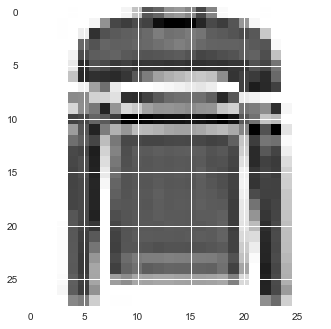

In [10]:
# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print"x_train shape:", x_train.shape, "y_train shape:", y_train.shape

# Print the number of training and test datasets
print x_train.shape[0], 'train set'
print x_test.shape[0], 'test set'

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = 5
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " (" + (fashion_mnist_labels[label_index]) + ")")
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index])
plt.show()

### Data normalization

In [54]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

### Split the data into train/validation/test data sets

In [55]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print "x_train shape:", x_train.shape, "y_train shape:", y_train.shape

# Print the number of training, validation, and test datasets
print x_train.shape[0], 'train set'
print x_valid.shape[0], 'validation set'
print x_test.shape[0], 'test set'

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


### Create the model architecture

In [56]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1568)              0         
__________

### Compile the model

In [57]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

### Train the model

In [58]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 151s 3ms/step - loss: 0.6137 - acc: 0.7728 - val_loss: 0.3841 - val_acc: 0.8626

Epoch 00001: val_loss improved from inf to 0.38411, saving model to model.weights.best.hdf5
Epoch 2/10
55000/55000 [==============================] - 148s 3ms/step - loss: 0.4170 - acc: 0.8483 - val_loss: 0.3150 - val_acc: 0.8890

Epoch 00002: val_loss improved from 0.38411 to 0.31504, saving model to model.weights.best.hdf5
Epoch 3/10
55000/55000 [==============================] - 167s 3ms/step - loss: 0.3716 - acc: 0.8650 - val_loss: 0.3031 - val_acc: 0.8928

Epoch 00003: val_loss improved from 0.31504 to 0.30305, saving model to model.weights.best.hdf5
Epoch 4/10
55000/55000 [==============================] - 155s 3ms/step - loss: 0.3430 - acc: 0.8742 - val_loss: 0.2754 - val_acc: 0.9018

Epoch 00004: val_loss improved from 0.30305 to 0.27544, saving model to model.weights.best.hdf5
Epoch 5/10
5500

### Load Model with the best validation accuracy

In [59]:
# Load the weights with the best validation accuracy
model.load_weights('model.weights.best.hdf5')

### Test Accuracy

In [60]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])

('\n', 'Test accuracy:', 0.9092)


### Visualize prediction

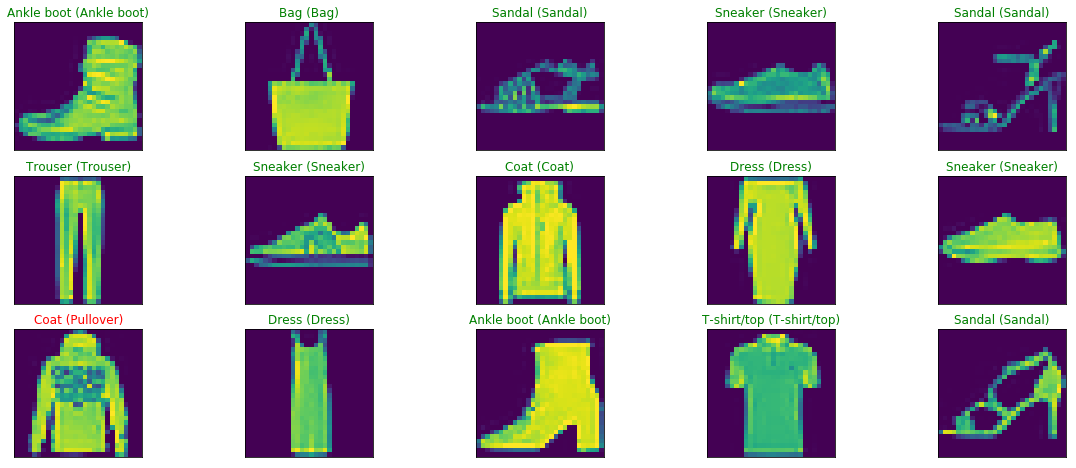

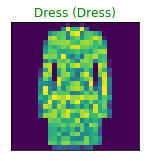

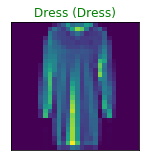

In [63]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
    plt.show()

##  PCA method









### Задание:
Будем решать задачу классификации на 10 классов. Каждый класс соответствует одному из типов одежды. Исходная размерность признакового пространства: `784`, каждый пиксель является признаком. Будем снижать размерность признакового пространства с помощью метода главных компонент (`PCA`). Ваша задача оценить качество решенения задачи классификации по метрике `accuracy` в зависимости от числа главных компонент. Также оцените дисперсию функции качества в зависимости от числа главных компонент.

Нарисуйте график зависимости функции качества и ее дисперсии от числа главных компонент.

In [3]:
pca = PCA(n_components=3)
used_indices = np.random.choice(np.arange(x_train.shape[0]), 10000, replace=False)
x_train_lowdim = pca.fit_transform(x_train[used_indices].reshape([-1, 784]))
lr = LogisticRegression()
lr.fit(x_train_lowdim, y_train[used_indices])
accuracy_score(y_test, lr.predict(pca.transform(x_test.reshape([-1, 784]))))

0.5773

Используйте следующую сетку числа главных компонент: `[3, 5, 7, 12, 18, 25, 33, 40, 48, 55]`. Для ускорения сходимости можете семплировать подвыборки из `X_train`. 

In [ ]:
#pca_steps = [3, 5, 7, 12, 18, 25, 33, 40, 48, 55]
pca_steps = np.arange(2, 80, 3)
n_repeat = 10

results = []
for pca_step in tqdm(pca_steps):

    result_step = []
    for i in range(n_repeat):

        pca = PCA(n_components=pca_step)
        used_indices = np.random.choice(
            np.arange(x_train.shape[0]), 10000, replace=False)
        x_train_reduced = pca.fit_transform(
            x_train[used_indices].reshape([-1, 784]))

        lr = LogisticRegression()
        lr.fit(x_train_reduced, y_train[used_indices])

        acc = accuracy_score(y_test, lr.predict(
            pca.transform(x_test.reshape([-1, 784]))))
        result_step.append(acc)
    results.append(result_step)
    
results = np.array(results)

In [8]:
plt.style.use('ggplot')
sns.set(font_scale=2)

def plot_results_std(results, steps, save_name, labels=None, xlabel='X'):
    
    f, ax = plt.subplots(2, 1, figsize=(10, 16))
    results = np.array(results)
    
    if len(results.shape) == 2:
        results = results[np.newaxis, :]
    
    for i, result in enumerate(results):
        
        means = result.mean(axis=1)
        stds = result.std(axis=1)
        if labels is not None:
            label = labels[i]
        else:
            label = 'None'
    
        ax[0].plot(steps, means, '-', ms=10, label=label)
        ax[0].fill_between(steps, means - stds, means + stds, alpha=0.2)
        ax[1].plot(steps, stds**2, label=label)
    
    ax[0].set_xlabel(xlabel)
    ax[0].set_ylabel('Accuracy score')
    if labels is not None:
        ax[0].legend()
    
    ax[1].set_xlabel(xlabel)
    ax[1].set_ylabel('Variance score')
    if labels is not None:
        ax[1].legend()
    
    plt.ticklabel_format(axis='y',style='sci',scilimits=(1,3))
    plt.savefig(save_name)
    plt.show()

## Вывод:
Для получения столь же хорошего accuracy как на всех данных, мы можем снизить размерность данных до ~40 компонент. Дисперсия функции качества одинакого мала при снижении размерности до любого числа компонент > 5

### Plot accuracy score (and errors) from train size


In [6]:

steps = np.hstack([np.arange(10, 200, 20),
                   np.arange(200, 1000, 50),
                   np.arange(1000, 2000, 100)])
n_repeat = 6

results = []
for step in tqdm(steps):
    result_step = []
    for i in range(n_repeat):
        
        used_indices = np.random.choice(np.arange(x_train.shape[0]), step, replace=False)
        
        lr = LogisticRegression()
        lr.fit(x_train[used_indices].reshape([-1, 784]), y_train[used_indices])
        
        acc = accuracy_score(y_test, lr.predict(x_test.reshape([-1, 784])))
        result_step.append(acc)
    results.append(result_step)

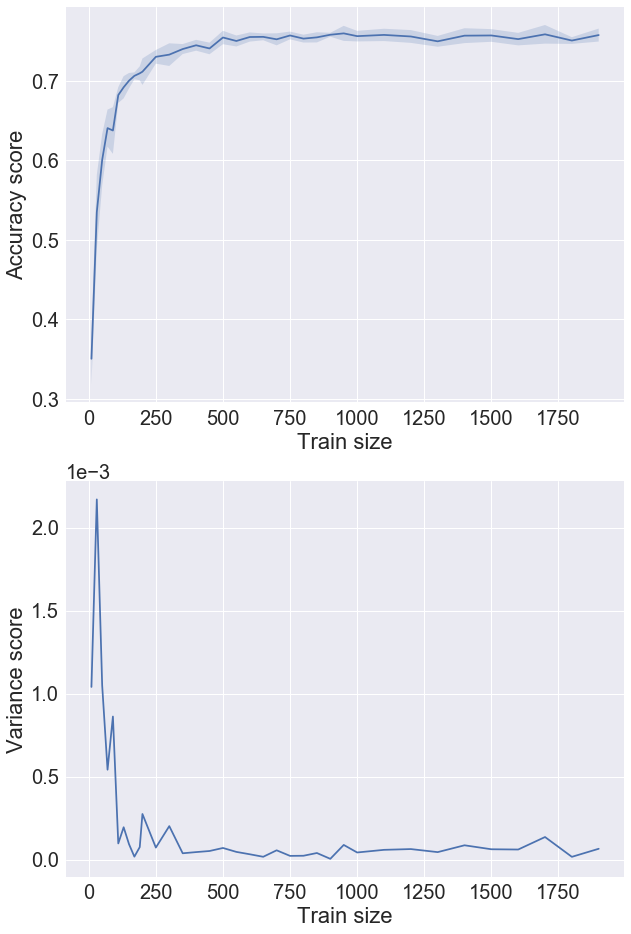

In [9]:
plot_results_std(results, steps, save_name='scores_from_train_size.png', xlabel='Train size')

## Вывод:
Для получения точности, аналогичной результату работы алгоритмы на всех данных, нам достаточно 500 объектов в обучающей выборке

### Plot accuracy score (and errors) from percentage of used features

In [ ]:

steps = np.hstack([np.arange(10, 200, 20),
                   np.arange(200, 1000, 50),
                   np.arange(1000, 2000, 100)])
n_repeat = 6

results = []
for step in tqdm(steps):
    result_step = []
    for i in range(n_repeat):
        
        used_indices = np.random.choice(np.arange(x_train.shape[0]), step, replace=False)
        
        lr = LogisticRegression()
        lr.fit(x_train[used_indices].reshape([-1, 784]), y_train[used_indices])
        
        acc = accuracy_score(y_test, lr.predict(x_test.reshape([-1, 784])))
        result_step.append(acc)
    results.append(result_step)

In [ ]:

plot_results_std(results, steps, save_name='scores_from_train_size.png', xlabel='Train size')


## Вывод:
Точность нелийнено зависит от числа используемых признаков. Лучший результат достигается при исользовании 95% всех признаков